In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage
import numpy as np

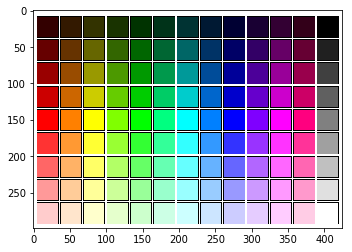

In [2]:
#i identified around 117 colors from this link and going to flatten the colors in any image based on these values.
#https://www.rapidtables.com/web/color/RGB_Color.html
primary_hex_117_colors = ["330000","331900","333300","193300","003300","003319","003333","001933","000033","190033","330033","330019","000000","660000","663300","666600","336600","006600","006633","006666","003366","000066","330066","660066","660033","202020","990000","994C00","999900","4C9900","009900","00994C","009999","004C99","000099","4C0099","990099","99004C","404040","CC0000","CC6600","CCCC00","66CC00","00CC00","00CC66","00CCCC","0066CC","0000CC","6600CC","CC00CC","CC0066","606060","FF0000","FF8000","FFFF00","80FF00","00FF00","00FF80","00FFFF","0080FF","0000FF","7F00FF","FF00FF","FF007F","808080","FF3333","FF9933","FFFF33","99FF33","33FF33","33FF99","33FFFF","3399FF","3333FF","9933FF","FF33FF","FF3399","A0A0A0","FF6666","FFB266","FFFF66","B2FF66","66FF66","66FFB2","66FFFF","66B2FF","6666FF","B266FF","FF66FF","FF66B2","C0C0C0","FF9999","FFCC99","FFFF99","CCFF99","99FF99","99FFCC","99FFFF","99CCFF","9999FF","CC99FF","FF99FF","FF99CC","E0E0E0","FFCCCC","FFE5CC","FFFFCC","E5FFCC","CCFFCC","CCFFE5","CCFFFF","CCE5FF","CCCCFF","E5CCFF","FFCCFF","FFCCE5","FFFFFF"]
#lets see what these colors are actually.
plt.imshow(imread('../resources/colorwheel.png'))

In [3]:
def hex_to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in (0, 2 ,4))

#converting rgb to decimal, int('FFFFFF', 16)
def rgb_to_dec(rgb):
    return int(('%02x%02x%02x' % rgb), 16)

def dec_to_rgb(rgbint):
    return (rgbint // 256 // 256 % 256, rgbint // 256 % 256, rgbint % 256)

#convert all the primaries hex to decimals.
primary_decimal_117_colors_with_rgb = [] # ->[rgb, dec, hex] [(0, 128, 64), 32832 , '008040']
primary_decimal_117_colors = []
for hexval in primary_hex_117_colors:
    rgb = hex_to_rgb(hexval)
    dec = rgb_to_dec(rgb)
    primary_decimal_117_colors_with_rgb.append([ [rgb[0],rgb[1],rgb[2]],dec,hexval]) 
    primary_decimal_117_colors.append(dec)

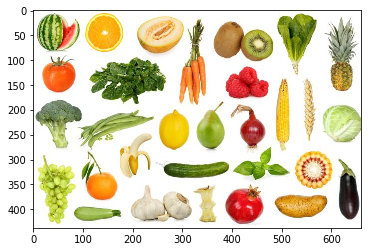

In [4]:
#sample image 1
vegetables = imread('https://ichef.bbci.co.uk/news/660/cpsprodpb/5655/production/_94810122_istock-494702400.jpg')
plt.imshow(vegetables)

In [5]:
sorted_colors = np.sort(primary_decimal_117_colors)
def replace_colors(clr):
    newclr = []
    dec = rgb_to_dec((clr[0],clr[1],clr[2]))
    for c in sorted_colors:
        if dec == c or dec < c:
            rgb = dec_to_rgb(c)
            newclr = [rgb[0],rgb[1],rgb[2]]
            break

    return newclr

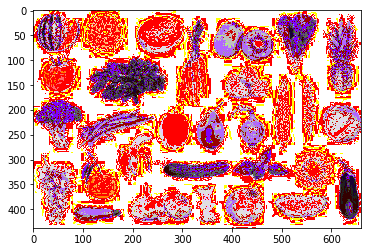

In [6]:
r,c,rgb = vegetables.shape
newveg = np.copy(vegetables)
for row in range(r-1):
    for col in range(c-1):
        newveg[row][col] = replace_colors(vegetables[row][col])
        
plt.imshow(newveg)

In [7]:
print vegetables[40][400]
clr = vegetables[40][400]
print rgb_to_dec((clr[0],clr[1],clr[2]))
replace_colors(vegetables[40][400])

[197 141  67]
12946755


[204, 0, 0]

In [8]:
sorted_colors

array([       0,       51,      102,      153,      204,      255,
           6451,    13056,    13081,    13107,    13158,    19609,
          26112,    26163,    26214,    26316,    33023,    39168,
          39244,    39321,    52224,    52326,    52428,    65280,
          65408,    65535,  1638451,  1651456,  2105376,  3342336,
        3342361,  3342387,  3342438,  3348736,  3355392,  3355647,
        3368448,  3381759,  3407667,  3407769,  3407871,  4210752,
        4980889,  5019904,  6316128,  6684672,  6684723,  6684774,
        6684876,  6697728,  6710784,  6711039,  6730495,  6736896,
        6750054,  6750130,  6750207,  8323327,  8421504,  8453888,
       10027008, 10027084, 10027161, 10040319, 10046464, 10066176,
       10066431, 10079487, 10092339, 10092441, 10092492, 10092543,
       10526880, 11691775, 11730790, 12632256, 13369344, 13369446,
       13369548, 13395456, 13408767, 13421568, 13421823, 13428223,
       13434777, 13434828, 13434853, 13434879, 14737632, 15060